In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12,8)

In [85]:
df = pd.read_csv("sale_train.csv")
df.head()
#4 items from 2 stores in 6 countries
#predicting sales for 2021, pandemic year

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240


In [3]:
df.isnull().values.any()

False

In [17]:
#have a look at each product and store individually
product1 = df.loc[df['product'] == 'Kaggle Advanced Techniques']
product2 = df.loc[df['product'] == 'Kaggle Getting Started']
product3 = df.loc[df['product'] == 'Kaggle Recipe Book']
product4 = df.loc[df['product'] == 'Kaggle for Kids: One Smart Goose']
store1 = df.loc[df['store'] == 'KaggleMart']
store2 = df.loc[df['store'] == 'KaggleRama']

In [18]:
sales_1 = product1['num_sold'].sum()
sales_2 = product2['num_sold'].sum()
sales_3 = product3['num_sold'].sum()
sales_4 = product4['num_sold'].sum()
sales_store1 = store1['num_sold'].sum()
sales_store2 = store2['num_sold'].sum()

In [22]:
print("product 1: " +str(sales_1))
print("product 2: " +str(sales_2))
print("product 3: " +str(sales_3))
print("product 4: " +str(sales_4))
print("store 1: " +str(sales_store1))
print("store 2: " +str(sales_store2))

product 1: 3913910
product 2: 3136903
product 3: 2349817
product 4: 4225029
store 1: 10117254
store 2: 3508405


In [ ]:
#so product 4 sells almost twice as many items as product 3, and products 1 and 2 are somewhat in the middle
#and store 1 sells a lot more than store 2
#how do stores and countries compare by product?

<AxesSubplot:xlabel='product', ylabel='num_sold'>

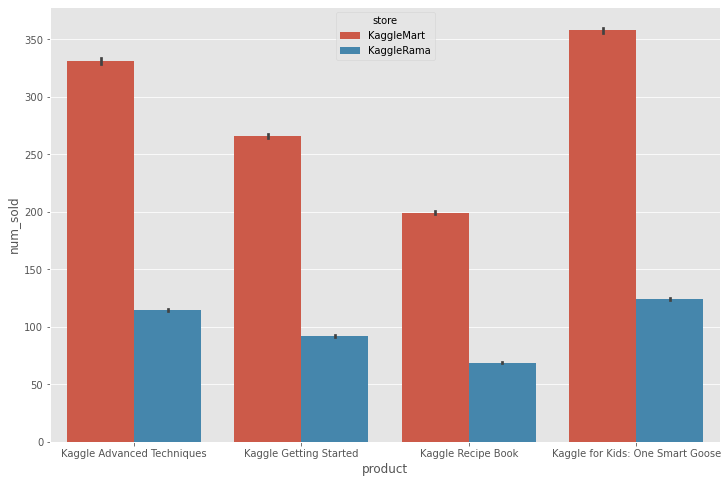

In [24]:
sns.barplot(x="product", y="num_sold", data=df, hue="store")
#kagglemart outperforms kagglerama on all 4 products

<AxesSubplot:xlabel='country', ylabel='num_sold'>

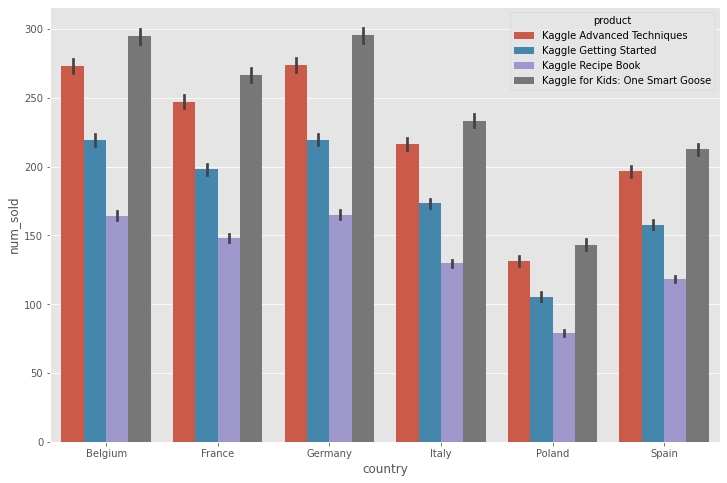

In [26]:
sns.barplot(x="country", y="num_sold", data=df, hue="product")
#the sales differences between the 4 products is the same across countries

<AxesSubplot:xlabel='date', ylabel='num_sold'>

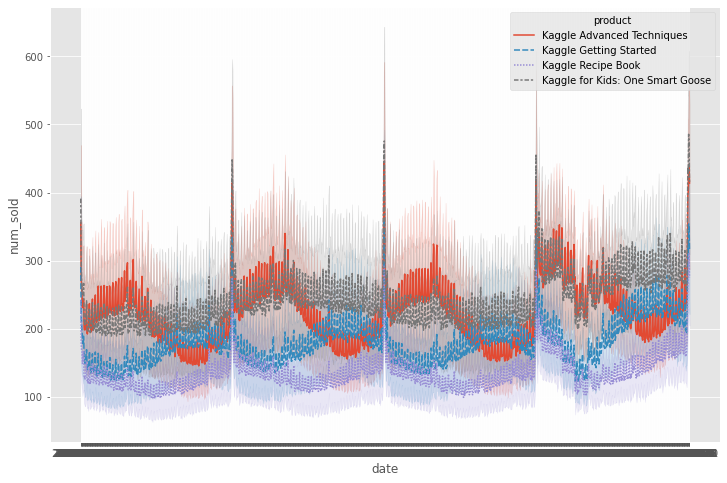

In [29]:
#time trends
sns.lineplot(x="date", y="num_sold",
             hue="product", style="product",
             data=df)
#pretty cyclical except for the last year, which should be 2020

In [45]:
#closer look at the cycle
p1_year = product1[product1.date > '2020-1-1']

In [47]:
max_date = df['date'].max()
print(max_date)

2020-12-31


<AxesSubplot:xlabel='date', ylabel='num_sold'>

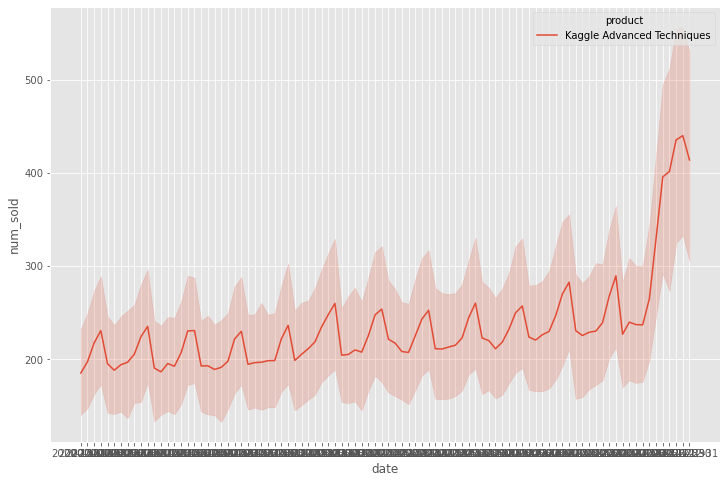

In [46]:
sns.lineplot(x="date", y="num_sold",
             hue="product", style="product",
             data=p1_year)
#so this is the 2020 sales trend for product 1

In [48]:
p1_year1 = product1[product1.date < '2017-12-31']

In [51]:
p1_year1

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240
8,8,2017-01-01,France,KaggleMart,Kaggle Advanced Techniques,610
12,12,2017-01-01,France,KaggleRama,Kaggle Advanced Techniques,220
16,16,2017-01-01,Germany,KaggleMart,Kaggle Advanced Techniques,700
...,...,...,...,...,...,...
17452,17452,2017-12-30,Italy,KaggleRama,Kaggle Advanced Techniques,203
17456,17456,2017-12-30,Poland,KaggleMart,Kaggle Advanced Techniques,278
17460,17460,2017-12-30,Poland,KaggleRama,Kaggle Advanced Techniques,96
17464,17464,2017-12-30,Spain,KaggleMart,Kaggle Advanced Techniques,502


<AxesSubplot:xlabel='date', ylabel='num_sold'>

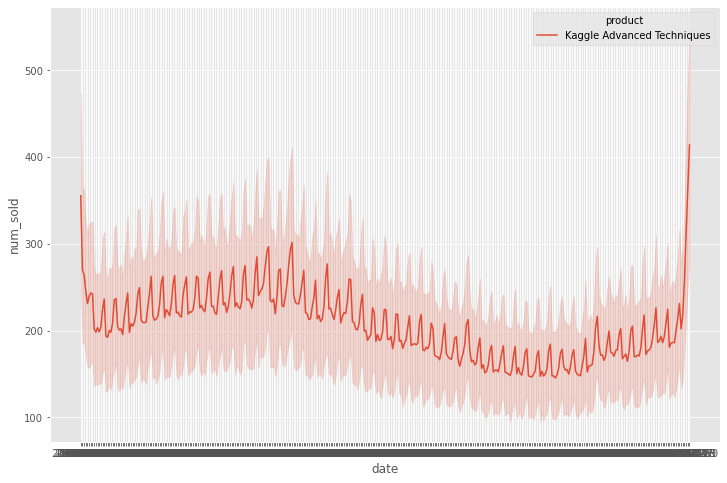

In [50]:
sns.lineplot(x="date", y="num_sold",
             hue="product", style="product",
             data=p1_year1)
#and this is the 2017 sales trend for product 1

In [52]:
#monthly 2017
p1_month = product1[product1.date < '2017-01-31']

In [53]:
p1_month

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240
8,8,2017-01-01,France,KaggleMart,Kaggle Advanced Techniques,610
12,12,2017-01-01,France,KaggleRama,Kaggle Advanced Techniques,220
16,16,2017-01-01,Germany,KaggleMart,Kaggle Advanced Techniques,700
...,...,...,...,...,...,...
1420,1420,2017-01-30,Italy,KaggleRama,Kaggle Advanced Techniques,101
1424,1424,2017-01-30,Poland,KaggleMart,Kaggle Advanced Techniques,121
1428,1428,2017-01-30,Poland,KaggleRama,Kaggle Advanced Techniques,40
1432,1432,2017-01-30,Spain,KaggleMart,Kaggle Advanced Techniques,231


<AxesSubplot:xlabel='date', ylabel='num_sold'>

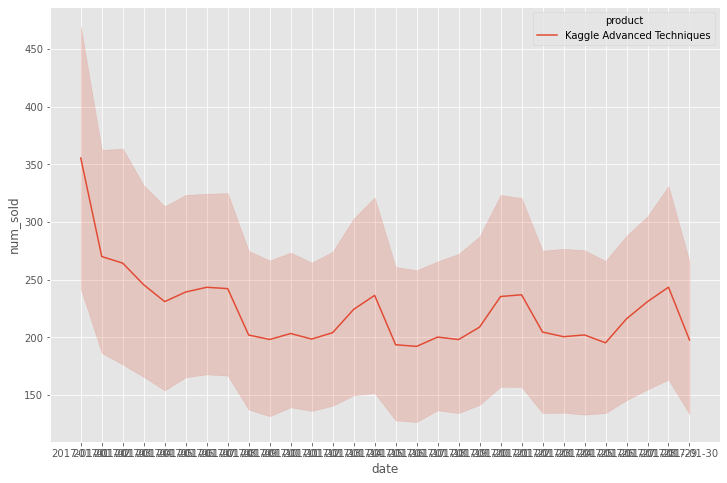

In [54]:
sns.lineplot(x="date", y="num_sold",
             hue="product", style="product",
             data=p1_month)

In [55]:
#so you had the peak at the start of the month and then 4 more peaks, probably weekends
#yearly there's a small peak around spring/early summer and a big peak at christmas
#whereas 2020 only had the christmas peak
#looking at numbers sold per month, 2017 was 200-300 for the first half of the year
#150-200 for the second half, and then over 400 for christmas
#2020 was fairly consistently 200-300 with christmas peak over 400

In [56]:
#breaking the date out by year and month
df.head()

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240


In [91]:
df[["year", "month", "day"]] = df.date.str.split("-", expand = True)
df.head()

,row_id,date,country,store,product,num_sold,year,month,day
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663,2017,01,01
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615,2017,01,01
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480,2017,01,01
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710,2017,01,01
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240,2017,01,01


<AxesSubplot:xlabel='year', ylabel='num_sold'>

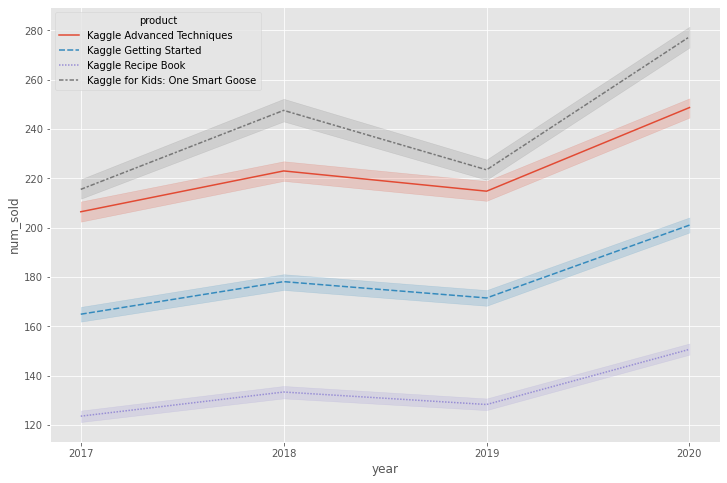

In [60]:
sns.lineplot(x="year", y="num_sold",
             hue="product", style="product",
             data=df)
#all book sales went up in 2020

In [63]:
#did they only go up during lockdown or all year?
covid = df[df.date > '2020-01-01']

In [64]:
covid

,row_id,date,country,store,product,num_sold,year,month,day
52608,52608,2020-01-02,Belgium,KaggleMart,Kaggle Advanced Techniques,452,2020,01,02
52609,52609,2020-01-02,Belgium,KaggleMart,Kaggle Getting Started,333,2020,01,02
52610,52610,2020-01-02,Belgium,KaggleMart,Kaggle Recipe Book,303,2020,01,02
52611,52611,2020-01-02,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,501,2020,01,02
52612,52612,2020-01-02,Belgium,KaggleRama,Kaggle Advanced Techniques,143,2020,01,02
...,...,...,...,...,...,...,...,...,...
70123,70123,2020-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,614,2020,12,31
70124,70124,2020-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,215,2020,12,31
70125,70125,2020-12-31,Spain,KaggleRama,Kaggle Getting Started,158,2020,12,31
70126,70126,2020-12-31,Spain,KaggleRama,Kaggle Recipe Book,135,2020,12,31


<AxesSubplot:xlabel='month', ylabel='num_sold'>

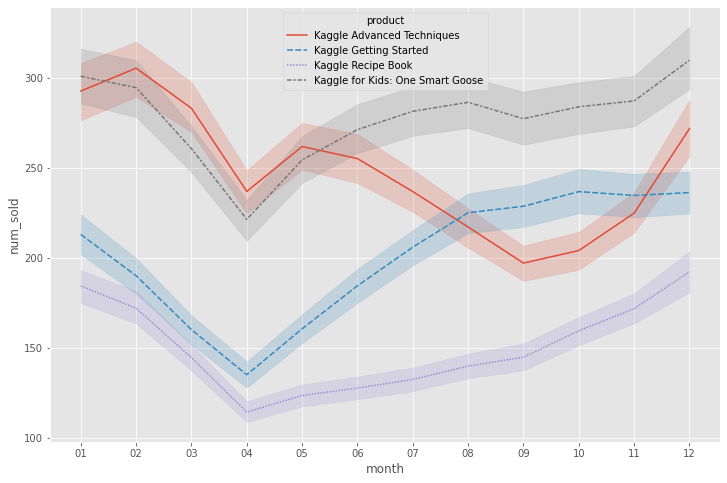

In [65]:
sns.lineplot(x="month", y="num_sold",
             hue="product", style="product",
             data=covid)
#no, sales actually tanked in April, which was peak lockdown, but then went up by a lot the next month except for P1

In [92]:
precovid = df[df.date < '2020-01-01']

<AxesSubplot:xlabel='month', ylabel='num_sold'>

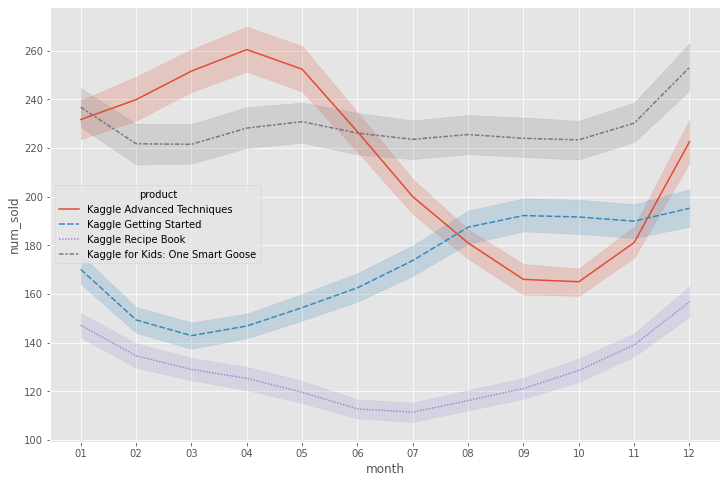

In [67]:
#normal monthly patterns
sns.lineplot(x="month", y="num_sold",
             hue="product", style="product",
             data=precovid)

#kaggle kids book is fairly stable and just peaks at christmas
#advanced tech peaks in april and dips over the summer
#getting started dips in spring and peaks in late summer when uni starts
#recipe book has a slight dip over the summer

#so compared to 2020, kids had an unexpected dip in april but is otherwise the same
#advanced had an unexpected dip in april but is otherwise the same
#getting started had an unexpected dip in april but is otherwise the same
#and recipes had its summer dip earlier

In [ ]:
#Considering the anomaly that was introduced by lockdown around April 2020, it's probably safest to exclude the 2020 numbers
#entirely and work with precovid data only
#while covid was still relevant in 2021, lockdown was never like the first one again

In [93]:
precovid
#predictions to be made are for num_sold by row_id (so includes tore and country and date patterns)
#so adding an ID by country+store+product
precovid["Combined"] = df['product'].astype(str) + df["country"].astype(str) + df["store"].astype(str)

C:\Users\slyth\AppData\Local\Temp\ipykernel_3316\1118168815.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precovid["Combined"] = df['product'].astype(str) + df["country"].astype(str) + df["store"].astype(str)


In [89]:
precovid

,row_id,date,country,store,product,num_sold,Combined
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663,Kaggle Advanced TechniquesBelgiumKaggleMart
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615,Kaggle Getting StartedBelgiumKaggleMart
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480,Kaggle Recipe BookBelgiumKaggleMart
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710,Kaggle for Kids: One Smart GooseBelgiumKaggleMart
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240,Kaggle Advanced TechniquesBelgiumKaggleRama
...,...,...,...,...,...,...,...
52555,52555,2019-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,427,Kaggle for Kids: One Smart GooseSpainKaggleMart
52556,52556,2019-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,130,Kaggle Advanced TechniquesSpainKaggleRama
52557,52557,2019-12-31,Spain,KaggleRama,Kaggle Getting Started,105,Kaggle Getting StartedSpainKaggleRama
52558,52558,2019-12-31,Spain,KaggleRama,Kaggle Recipe Book,86,Kaggle Recipe BookSpainKaggleRama


In [94]:
precovid["DayInYear"] = precovid['day'].astype(str) + "-" + precovid["month"].astype(str)

C:\Users\slyth\AppData\Local\Temp\ipykernel_3316\2311960967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precovid["DayInYear"] = precovid['day'].astype(str) + "-" + precovid["month"].astype(str)


In [95]:
precovid

,row_id,date,country,store,product,num_sold,year,month,day,Combined,DayInYear
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663,2017,01,01,Kaggle Advanced TechniquesBelgiumKaggleMart,01-01
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615,2017,01,01,Kaggle Getting StartedBelgiumKaggleMart,01-01
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480,2017,01,01,Kaggle Recipe BookBelgiumKaggleMart,01-01
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710,2017,01,01,Kaggle for Kids: One Smart GooseBelgiumKaggleMart,01-01
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240,2017,01,01,Kaggle Advanced TechniquesBelgiumKaggleRama,01-01
...,...,...,...,...,...,...,...,...,...,...,...
52555,52555,2019-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,427,2019,12,31,Kaggle for Kids: One Smart GooseSpainKaggleMart,31-12
52556,52556,2019-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,130,2019,12,31,Kaggle Advanced TechniquesSpainKaggleRama,31-12
52557,52557,2019-12-31,Spain,KaggleRama,Kaggle Getting Started,105,2019,12,31,Kaggle Getting StartedSpainKaggleRama,31-12
52558,52558,2019-12-31,Spain,KaggleRama,Kaggle Recipe Book,86,2019,12,31,Kaggle Recipe BookSpainKaggleRama,31-12


In [96]:
precovid_num = precovid
for col_name in precovid_num.columns:
    if(precovid_num[col_name].dtype == "object"):
        precovid_num[col_name] = precovid_num[col_name].astype("category")
        precovid_num[col_name] = precovid_num[col_name].cat.codes
        
precovid_num

C:\Users\slyth\AppData\Local\Temp\ipykernel_3316\735889042.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precovid_num[col_name] = precovid_num[col_name].astype("category")
C:\Users\slyth\AppData\Local\Temp\ipykernel_3316\735889042.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precovid_num[col_name] = precovid_num[col_name].cat.codes
C:\Users\slyth\AppData\Local\Temp\ipykernel_3316\735889042.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,row_id,date,country,store,product,num_sold,year,month,day,Combined,DayInYear
0,0,0,0,0,0,663,0,0,0,0,0
1,1,0,0,0,1,615,0,0,0,12,0
2,2,0,0,0,2,480,0,0,0,24,0
3,3,0,0,0,3,710,0,0,0,36,0
4,4,0,0,1,0,240,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
52555,52555,1094,5,0,3,427,2,11,30,46,364
52556,52556,1094,5,1,0,130,2,11,30,11,364
52557,52557,1094,5,1,1,105,2,11,30,23,364
52558,52558,1094,5,1,2,86,2,11,30,35,364


In [97]:
#quick correlation matrix
precovid_num.corr()

,row_id,date,country,store,product,num_sold,year,month,day,Combined,DayInYear
row_id,1.000000,9.999996e-01,9.004688e-04,1.318151e-04,7.368690e-05,0.018657,9.428090e-01,3.321668e-01,3.171022e-02,2.981368e-04,4.239938e-02
date,1.000000,1.000000e+00,5.113342e-15,1.966952e-15,1.596207e-15,0.019070,9.428094e-01,3.321670e-01,3.171023e-02,1.723451e-15,4.239939e-02
country,0.000900,5.113342e-15,1.000000e+00,3.265242e-18,6.336646e-18,-0.354020,4.891091e-15,1.473004e-15,1.226563e-17,2.465568e-01,5.962007e-17
store,0.000132,1.966952e-15,3.265242e-18,1.000000e+00,6.450054e-18,-0.716922,1.972042e-15,3.105847e-16,8.875815e-17,3.609223e-02,1.006351e-16
product,0.000074,1.596207e-15,6.336646e-18,6.450054e-18,1.000000e+00,-0.000715,1.272333e-15,1.179839e-15,1.194475e-16,9.684560e-01,1.583555e-16
num_sold,0.018657,1.907035e-02,-3.540195e-01,-7.169222e-01,-7.153898e-04,1.000000,2.237077e-02,-6.742750e-03,6.913130e-03,-1.138541e-01,6.499061e-03
year,0.942809,9.428094e-01,4.891091e-15,1.972042e-15,1.272333e-15,0.022371,1.000000e+00,9.672046e-17,-6.626154e-15,2.069661e-15,-2.614906e-15
month,0.332167,3.321670e-01,1.473004e-15,3.105847e-16,1.179839e-15,-0.006743,9.672046e-17,1.000000e+00,1.189318e-02,-6.939856e-16,4.414797e-02
day,0.031710,3.171023e-02,1.226563e-17,8.875815e-17,1.194475e-16,0.006913,-6.626154e-15,1.189318e-02,1.000000e+00,-3.736398e-18,9.994580e-01
Combined,0.000298,1.723451e-15,2.465568e-01,3.609223e-02,9.684560e-01,-0.113854,2.069661e-15,-6.939856e-16,-3.736398e-18,1.000000e+00,-2.699298e-17


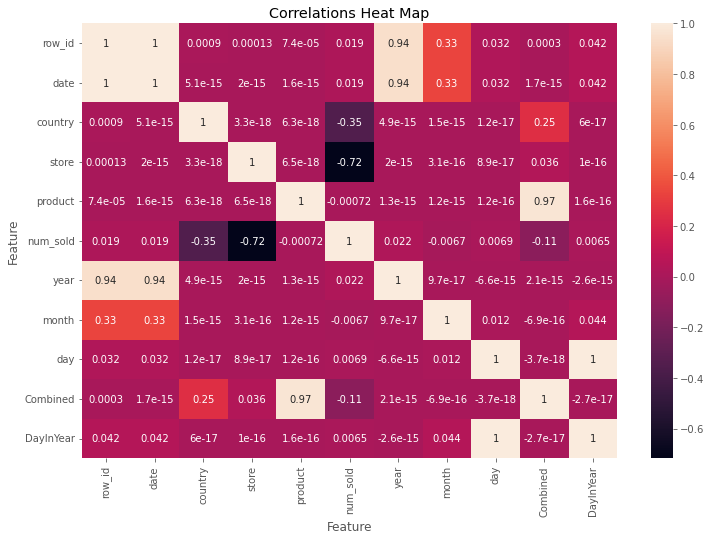

In [98]:
corr_matrix = precovid_num.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlations Heat Map")
plt.xlabel("Feature")
plt.ylabel("Feature")
plt.show()

#as we know from the graphs, store is correlated with sales
#sales is also correlated with the combined value and the country specifically

In [99]:
from sklearn.linear_model import LinearRegression

x=precovid[['Combined', 'DayInYear']]
y=precovid[['num_sold']]

reg = LinearRegression().fit(x, y)

In [100]:
test = pd.read_csv("test_sale.csv")
test

,row_id,date,country,store,product
0,70128,2021-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques
1,70129,2021-01-01,Belgium,KaggleMart,Kaggle Getting Started
2,70130,2021-01-01,Belgium,KaggleMart,Kaggle Recipe Book
3,70131,2021-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose
4,70132,2021-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques
...,...,...,...,...,...
17515,87643,2021-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose
17516,87644,2021-12-31,Spain,KaggleRama,Kaggle Advanced Techniques
17517,87645,2021-12-31,Spain,KaggleRama,Kaggle Getting Started
17518,87646,2021-12-31,Spain,KaggleRama,Kaggle Recipe Book


In [101]:
test["Combined"] = test['product'].astype(str) + test["country"].astype(str) + test["store"].astype(str)
test[["year", "month", "day"]] = test.date.str.split("-", expand = True)

In [104]:
test["DayInYear"] = test['day'].astype(str) + "-" + test["month"].astype(str)
test

,row_id,date,country,store,product,Combined,year,month,day,DayInYear
0,70128,2021-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,Kaggle Advanced TechniquesBelgiumKaggleMart,2021,01,01,01-01
1,70129,2021-01-01,Belgium,KaggleMart,Kaggle Getting Started,Kaggle Getting StartedBelgiumKaggleMart,2021,01,01,01-01
2,70130,2021-01-01,Belgium,KaggleMart,Kaggle Recipe Book,Kaggle Recipe BookBelgiumKaggleMart,2021,01,01,01-01
3,70131,2021-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,Kaggle for Kids: One Smart GooseBelgiumKaggleMart,2021,01,01,01-01
4,70132,2021-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,Kaggle Advanced TechniquesBelgiumKaggleRama,2021,01,01,01-01
...,...,...,...,...,...,...,...,...,...,...
17515,87643,2021-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,Kaggle for Kids: One Smart GooseSpainKaggleMart,2021,12,31,31-12
17516,87644,2021-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,Kaggle Advanced TechniquesSpainKaggleRama,2021,12,31,31-12
17517,87645,2021-12-31,Spain,KaggleRama,Kaggle Getting Started,Kaggle Getting StartedSpainKaggleRama,2021,12,31,31-12
17518,87646,2021-12-31,Spain,KaggleRama,Kaggle Recipe Book,Kaggle Recipe BookSpainKaggleRama,2021,12,31,31-12


In [105]:
test = test
for col_name in test.columns:
    if(test[col_name].dtype == "object"):
        test[col_name] = test[col_name].astype("category")
        test[col_name] = test[col_name].cat.codes
        
test

,row_id,date,country,store,product,Combined,year,month,day,DayInYear
0,70128,0,0,0,0,0,0,0,0,0
1,70129,0,0,0,1,12,0,0,0,0
2,70130,0,0,0,2,24,0,0,0,0
3,70131,0,0,0,3,36,0,0,0,0
4,70132,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
17515,87643,364,5,0,3,46,0,11,30,364
17516,87644,364,5,1,0,11,0,11,30,364
17517,87645,364,5,1,1,23,0,11,30,364
17518,87646,364,5,1,2,35,0,11,30,364


In [106]:
x_new=test[['Combined', 'DayInYear']]

In [107]:
test['num_sold'] = reg.predict(x_new)
test.head()

,row_id,date,country,store,product,Combined,year,month,day,DayInYear,num_sold
0,70128,0,0,0,0,0,0,0,0,0,208.764899
1,70129,0,0,0,1,12,0,0,0,0,196.364161
2,70130,0,0,0,2,24,0,0,0,0,183.963422
3,70131,0,0,0,3,36,0,0,0,0,171.562683
4,70132,0,0,1,0,1,0,0,0,0,207.731504


In [109]:
test = test.round({'num_sold': 0})
test.head()

,row_id,date,country,store,product,Combined,year,month,day,DayInYear,num_sold
0,70128,0,0,0,0,0,0,0,0,0,209.0
1,70129,0,0,0,1,12,0,0,0,0,196.0
2,70130,0,0,0,2,24,0,0,0,0,184.0
3,70131,0,0,0,3,36,0,0,0,0,172.0
4,70132,0,0,1,0,1,0,0,0,0,208.0


In [111]:
test['num_sold'] = test['num_sold'].astype(int)

In [112]:
test.head()

,row_id,date,country,store,product,Combined,year,month,day,DayInYear,num_sold
0,70128,0,0,0,0,0,0,0,0,0,209
1,70129,0,0,0,1,12,0,0,0,0,196
2,70130,0,0,0,2,24,0,0,0,0,184
3,70131,0,0,0,3,36,0,0,0,0,172
4,70132,0,0,1,0,1,0,0,0,0,208


In [113]:
test_submission = test[['row_id', 'num_sold']]
test_submission.head()

,row_id,num_sold
0,70128,209
1,70129,196
2,70130,184
3,70131,172
4,70132,208


In [114]:
test_submission.to_csv('test_sale_pred.csv')

Outcome:50.83 score
Place 931/969